In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

## datetime 표준 라이브러리

In [3]:
dt = datetime(2020,11,20,7,12,13)
dt

datetime.datetime(2020, 11, 20, 7, 12, 13)

In [4]:
print(dt.year, dt.month, dt.hour, dt.minute,dt.second)

2020 11 7 12 13


In [7]:
cur = datetime.now()
cur

datetime.datetime(2021, 9, 30, 13, 26, 28, 870671)

### 시계열데이터의 정의
##### 1.인덱스가 datetime 형
####  2.시계열데이터의 indexing, slicing 을 사용가능


In [14]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1 )
df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
          '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
# df.index=[datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),
#           datetime(2019,4,1),datetime(2019,5,1),datetime(2019,6,1),
#           datetime(2019,7,1),datetime(2019,8,1) ]


In [15]:
df

,0,1
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


In [16]:
df.index

Index(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01'],
      dtype='object')

## 문자열을 datetime 형으로 형변환
- 2019-03-01 11:10:12
- 2019/03/01
- 2019.03.01

In [17]:
df.index = pd.to_datetime(df.index)

In [18]:
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [19]:
df.index=['2019년1월1일','2019년2월1일','2019년3월1일','2019년4월1일',
          '2019년5월1일','2019년6월1일','2019년7월1일','2019년8월1일']


In [20]:
df.index

Index(['2019년1월1일', '2019년2월1일', '2019년3월1일', '2019년4월1일', '2019년5월1일',
       '2019년6월1일', '2019년7월1일', '2019년8월1일'],
      dtype='object')

In [21]:
df.index = pd.to_datetime(df.index)  # 한글로 구분되어 있어서 오류남

ParserError: Unknown string format: 2019년1월1일

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- 날짜 format참고

In [22]:
df.index = pd.to_datetime(df.index,format='%Y년%m월%d일')  # format 지정해줘야 오류 안남

In [23]:
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [24]:
df.columns=['A','B']
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


## 이동평균

In [48]:
df.rolling( window=2 ).mean() #두개의 평균값이 아래에 표시. 그래서 첫 행 비어있음. 

,A,B
2019-01-01,NaN,NaN
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


In [49]:
df.rolling( window=3 ).mean() #세개의 평균값이 아래에 표시. 그래서 1,2 행 비어있음. 

,A,B
2019-01-01,NaN,NaN
2019-02-01,NaN,NaN
2019-03-01,3.0,4.666667
2019-04-01,5.0,6.000000
2019-05-01,7.0,8.666667
2019-06-01,9.0,9.333333
2019-07-01,11.0,12.666667
2019-08-01,13.0,15.333333


***

In [25]:
!pip install pandas_datareader

In [26]:
from pandas_datareader import data  #주식데이터

In [27]:
samsungDF = data.get_data_yahoo('005930.KS','2017-01-01')
samsungDF

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31618.542969
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31951.369141
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31671.087891
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31145.576172
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31706.126953
...,...,...,...,...,...,...
2021-09-24,77700.0,77100.0,77600.0,77300.0,12247274.0,77300.000000
2021-09-27,77700.0,77000.0,77300.0,77700.0,11699798.0,77700.000000
2021-09-28,77800.0,76200.0,77700.0,76300.0,15406382.0,76300.000000


In [28]:
samsungDF.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='Date', length=1159, freq=None)

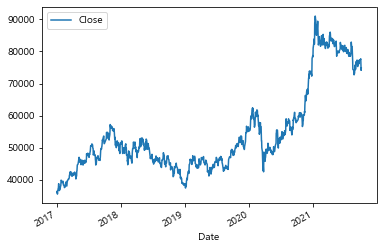

In [29]:
samsungDF.plot(y='Close')
plt.show()

In [31]:
samsungDF.loc['2017']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31618.542969
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31951.369141
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31671.087891
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31145.576172
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31706.126953
...,...,...,...,...,...,...
2017-12-21,51060.0,49100.0,51000.0,49140.0,15624300.0,43429.230469
2017-12-22,49960.0,49240.0,49400.0,49700.0,11199650.0,43924.148438
2017-12-26,50100.0,48200.0,49760.0,48200.0,16039850.0,42598.476562


In [32]:
samsungDF.loc['2017-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31618.542969
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31951.369141
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31671.087891
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31145.576172
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31706.126953
2017-01-09,37500.0,36560.0,36600.0,37220.0,13194900.0,32599.511719
2017-01-10,37400.0,37080.0,37280.0,37240.0,9099800.0,32617.021484
2017-01-11,38560.0,37420.0,37520.0,38280.0,12018150.0,33527.917969
2017-01-12,38800.0,37980.0,38000.0,38800.0,11669150.0,33983.355469


In [34]:
samsungDF.loc['2017':'2019']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31618.542969
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31951.369141
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31671.087891
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31145.576172
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31706.126953
...,...,...,...,...,...,...
2019-12-23,56400.0,55100.0,56100.0,55500.0,9839252.0,52253.828125
2019-12-24,55700.0,54800.0,55600.0,55000.0,11868463.0,51783.078125
2019-12-26,55400.0,54400.0,54700.0,55400.0,9645034.0,52159.683594


In [35]:
samsungDF.loc['2017-02':'2017-08']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,39660.0,39040.0,39540.0,39120.0,14150400.0,34263.632812
2017-02-02,39660.0,39200.0,39600.0,39360.0,15029300.0,34473.847656
2017-02-03,39500.0,39180.0,39400.0,39460.0,10386350.0,34561.433594
2017-02-06,39660.0,39140.0,39580.0,39560.0,8860700.0,34649.011719
2017-02-07,39580.0,38760.0,39560.0,38820.0,14041800.0,34000.882812
...,...,...,...,...,...,...
2017-08-25,47880.0,46720.0,47880.0,47020.0,11243550.0,41443.039062
2017-08-28,47240.0,45960.0,47020.0,46100.0,9962100.0,40632.152344
2017-08-29,46080.0,45160.0,45640.0,46080.0,12623650.0,40614.519531


In [36]:
samsungDF.loc[:'2018']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31618.542969
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31951.369141
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31671.087891
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31145.576172
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31706.126953
...,...,...,...,...,...,...
2018-12-21,38650.0,38100.0,38200.0,38650.0,14947080.0,35239.558594
2018-12-24,39050.0,38300.0,38500.0,38800.0,9729530.0,35376.320312
2018-12-26,38750.0,38300.0,38400.0,38350.0,12707675.0,34966.027344


In [37]:
samsungDF['year'] = samsungDF.index.year


In [38]:
samsungDF.groupby('year').mean()

,High,Low,Open,Close,Volume,Adj Close
year,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,40758.980444
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,42212.946410
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,43382.564318
2020,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,54788.251748
2021,81879.459459,80517.837838,81206.486486,81108.108108,1.995710e+07,80753.324240


In [39]:
samsungDF.groupby( samsungDF.index.year ).mean()


,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,40758.980444,2017
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,42212.946410,2018
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,43382.564318,2019
2020,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,54788.251748,2020
2021,81879.459459,80517.837838,81206.486486,81108.108108,1.995710e+07,80753.324240,2021


In [40]:
samsungDF.groupby( [samsungDF.index.year,samsungDF.index.month]  ).mean()


High           Low          Open         Close  \
Date Date                                                           
2017 1     37826.000000  37079.000000  37340.000000  37486.000000   
     2     38912.000000  38276.000000  38578.000000  38571.000000   
     3     41447.272727  40740.909091  40890.000000  41166.363636   
     4     42261.000000  41549.000000  41910.000000  41959.000000   
     5     46040.000000  45188.421053  45590.526316  45550.526316   
     6     46869.523810  46216.190476  46460.952381  46574.285714   
     7     49745.714286  48939.047619  49334.285714  49393.333333   
     8     47323.636364  46495.454545  47096.363636  46858.181818   
     9     50516.000000  49716.000000  50023.000000  50214.000000   
     10    54593.750000  53442.500000  53997.500000  53961.250000   
     11    56005.000000  54952.000000  55669.000000  55366.000000   
     12    51328.888889  50258.888889  50790.000000  50733.333333   
2018 1     50688.571429  49367.619048  50108.571429  49933.333333   
     2     48043.333333  46793.333333  47413.333333  47248.888889   
     3     50141.904762  49035.238095  49611.428571  49683.809524   
     4     50606.666667  49520.000000  50019.047619  50163.809524   
     5     51835.000000  50647.500000  51407.500000  51102.500000   
     6     48905.263158  47907.894737  48526.315789  48371.052632   
     7     46704.545455  45890.909091  46320.454545  46220.454545   
     8     46229.545455  45431.818182  45763.636364  45947.727273   
     9     46476.470588  45620.588235  46076.470588  46064.705882   
     10    44169.047619  43133.333333  43614.285714  43600.000000   
     11    43807.142857  42857.142857  43366.666667  43390.476190   
     12    40260.526316  39515.789474  39813.157895  39826.315789   
2019 1     41902.272727  40970.454545  41415.909091  41600.000000   
     2     46779.411765  45861.764706  46370.588235  46308.823529   
     3     45010.000000  44072.500000  44542.500000  44560.000000   
     4     46490.909091  45611.363636  46088.636364  46061.363636   
     5     43573.809524  42602.380952  43123.809524  43023.809524   
     6     45057.894737  44357.894737  44663.157895  44865.789474   
     7     46619.565217  45865.217391  46276.086957  46215.217391   
     8     44254.761905  43483.333333  43871.428571  43840.476190   
     9     47526.315789  46750.000000  47089.473684  47294.736842   
     10    50376.190476  49516.666667  49933.333333  49880.952381   
     11    52655.000000  51730.000000  52270.000000  52195.000000   
     12    53982.500000  53002.500000  53495.000000  53507.500000   
2020 1     59475.000000  58195.000000  58870.000000  58815.000000   
     2     59675.000000  58330.000000  58890.000000  59085.000000   
     3     51440.909091  49325.000000  50381.818182  50331.818182   
     4     49567.500000  48445.000000  49127.500000  49045.000000   
     5     49476.315789  48626.315789  49071.052632  49100.000000   
     6     53768.181818  52218.181818  52950.000000  52986.363636   
     7     55356.521739  54256.521739  54930.434783  54726.086957   
     8     57865.000000  56600.000000  57360.000000  56980.000000   
     9     58761.904762  57709.523810  58176.190476  58176.190476   
     10    60242.105263  59263.157895  59836.842105  59736.842105   
     11    64019.047619  62476.190476  63090.476190  63419.047619   
     12    74233.333333  72600.000000  73066.666667  73619.047619   
2021 1     88410.000000  85190.000000  86365.000000  86565.000000   
     2     84177.777778  82400.000000  83272.222222  83127.777778   
     3     82763.636364  81609.090909  82250.000000  82072.727273   
     4     84150.000000  83095.454545  83786.363636  83586.363636   
     5     81105.263158  80015.789474  80547.368421  80521.052632   
     6     81590.909091  80740.909091  81195.454545  81104.545455   
     7     79963.636364  79250.000000  79645.454545  79577.272727   
     8     77914.285714  76428.571429  77204.761905  77023.809524   
     9     76884.

## resample : 시계열 데이터 집계전용 함수

In [43]:
samsungDF.resample('Y').mean()  #년 별 집계, 평균값

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-12-31,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,40758.980444,2017
2018-12-31,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,42212.946410,2018
2019-12-31,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,43382.564318,2019
2020-12-31,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,54788.251748,2020
2021-12-31,81879.459459,80517.837838,81206.486486,81108.108108,1.995710e+07,80753.324240,2021


In [44]:
samsungDF.resample('M').mean()  #월 별 집계, 평균값

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-31,37826.000000,37079.000000,37340.000000,37486.000000,1.102530e+07,32832.482715,2017
2017-02-28,38912.000000,38276.000000,38578.000000,38571.000000,1.192612e+07,33782.790430,2017
2017-03-31,41447.272727,40740.909091,40890.000000,41166.363636,1.193883e+07,36067.099077,2017
2017-04-30,42261.000000,41549.000000,41910.000000,41959.000000,1.191310e+07,36873.765820,2017
2017-05-31,46040.000000,45188.421053,45590.526316,45550.526316,1.358061e+07,40030.015831,2017
2017-06-30,46869.523810,46216.190476,46460.952381,46574.285714,1.101470e+07,40941.462984,2017
2017-07-31,49745.714286,48939.047619,49334.285714,49393.333333,1.058194e+07,43534.867932,2017
2017-08-31,47323.636364,46495.454545,47096.363636,46858.181818,1.218491e+07,41300.406783,2017
2017-09-30,50516.000000,49716.000000,50023.000000,50214.000000,1.014741e+07,44270.469922,2017


In [45]:
samsungDF.resample('W').mean()  #주 별 집계, 평균값

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-08,36376.0,35916.0,36200.0,36100.0,7965680.00,31618.540625,2017.0
2017-01-15,38116.0,37300.0,37500.0,37800.0,12387290.00,33107.503516,2017.0
2017-01-22,37624.0,36684.0,37064.0,37048.0,10448300.00,32448.855469,2017.0
2017-01-29,39010.0,38155.0,38270.0,38880.0,12126875.00,34053.430664,2017.0
2017-02-05,39680.0,39220.0,39610.0,39350.0,14389562.50,34465.086914,2017.0
...,...,...,...,...,...,...,...
2021-09-05,76560.0,75220.0,76040.0,76140.0,16175209.80,76140.000000,2021.0
2021-09-12,76660.0,75580.0,76320.0,76060.0,13120542.00,76060.000000,2021.0
2021-09-19,77200.0,76020.0,76660.0,76640.0,14350216.80,76640.000000,2021.0


In [46]:
samsungDF.resample('W-MON').mean()  #주 별 집계-월요일만, 평균값

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,36240.000000,35880.000000,35980.000000,36100.000000,4.650600e+06,31618.542969,2017.0
2017-01-09,36628.000000,36052.000000,36324.000000,36324.000000,9.674540e+06,31814.734375,2017.0
2017-01-16,38180.000000,37252.000000,37552.000000,37688.000000,1.307061e+07,33009.405469,2017.0
2017-01-23,37672.000000,36820.000000,37132.000000,37328.000000,8.888080e+06,32694.096484,2017.0
2017-01-30,39326.666667,38540.000000,38626.666667,39153.333333,1.323237e+07,34292.832031,2017.0
...,...,...,...,...,...,...,...
2021-09-06,76980.000000,75700.000000,76320.000000,76680.000000,1.621005e+07,76680.000000,2021.0
2021-09-13,76400.000000,75280.000000,76000.000000,75860.000000,1.282786e+07,75860.000000,2021.0
2021-09-20,77425.000000,76250.000000,77025.000000,76725.000000,1.508833e+07,76725.000000,2021.0


In [47]:
samsungDF.resample('Q').mean()  #분기별, 평균값

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-03-31,39461.290323,38764.516129,38999.032258,39141.935484,1.164004e+07,34286.800687,2017
2017-06-30,45070.666667,44335.000000,44668.333333,44711.666667,1.212670e+07,39296.938997,2017
2017-09-30,49144.444444,48332.380952,48771.428571,48768.571429,1.100376e+07,42988.104353,2017
2017-12-31,54028.148148,52940.370370,53547.407407,53405.555556,1.116375e+07,47213.847584,2017
2018-03-31,49703.666667,48479.000000,49126.000000,49040.666667,1.534626e+07,43742.268945,2018
2018-06-30,50477.333333,49385.333333,50009.166667,49909.000000,1.393414e+07,44842.191016,2018
2018-09-30,46469.672131,45650.000000,46051.639344,46078.688525,9.944799e+06,41709.467789,2018
2018-12-31,42827.049180,41911.475410,42345.081967,42352.459016,1.123298e+07,38626.031122,2018
2019-03-31,44361.016949,43431.355932,43903.389831,43960.169492,1.220284e+07,40465.573822,2019


In [53]:
r = samsungDF.rolling(window=20).mean()['Close']

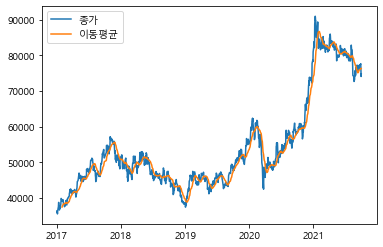

In [55]:
plt.plot(samsungDF.index,samsungDF['Close'])
plt.plot(samsungDF.index,r)  #이동평균은 추세선이라고 보면 됨
plt.legend(['종가','이동평균']) 
plt.show()

***

In [ ]:
# 1. 2019년도 2월~10월 까지 개장가 종가 데이터를 출력하시오

In [70]:
samsungDF.loc['2019-02':'2019-10',['Open','Close']]

,Open,Close
Date,,
2019-02-01,46650.0,46350.0
2019-02-07,46800.0,46200.0
2019-02-08,45700.0,44800.0
2019-02-11,44500.0,45000.0
2019-02-12,44650.0,46050.0
...,...,...
2019-10-25,50800.0,50900.0
2019-10-28,50700.0,51300.0
2019-10-29,51400.0,51100.0


In [ ]:
# 2. 2020년도 주별 집계현황을 구하시오

In [71]:
samsungDF.loc['2020'].resample('W').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2020-01-05,56300.0,54950.000000,55750.0,55350.000000,14207741.50,52447.740234,2020
2020-01-12,57540.0,56360.000000,56800.0,57240.000000,16778529.80,54238.636719,2020
2020-01-19,60660.0,59580.000000,60100.0,60200.000000,14594759.40,57043.431250,2020
2020-01-26,62400.0,61000.000000,61575.0,61725.000000,13481917.00,58488.469727,2020
2020-02-02,59075.0,57575.000000,58775.0,57875.000000,20170509.75,54840.340820,2020
2020-02-09,59780.0,58060.000000,58760.0,59420.000000,19240653.80,56304.330469,2020
2020-02-16,60940.0,59840.000000,60280.0,60520.000000,13761680.20,57346.649219,2020
2020-02-23,60880.0,59680.000000,60340.0,60140.000000,13347135.00,56986.577344,2020
2020-03-01,57100.0,55740.000000,56180.0,56260.000000,25651963.00,53310.021875,2020


In [ ]:
# 3.2020년 이후 년및 월별 집계현황을 구하시오

In [73]:
samsungDF.loc['2020':].groupby( [samsungDF.loc['2020':].index.year,samsungDF.loc['2020':].index.month]).mean()


High           Low          Open         Close  \
Date Date                                                           
2020 1     59475.000000  58195.000000  58870.000000  58815.000000   
     2     59675.000000  58330.000000  58890.000000  59085.000000   
     3     51440.909091  49325.000000  50381.818182  50331.818182   
     4     49567.500000  48445.000000  49127.500000  49045.000000   
     5     49476.315789  48626.315789  49071.052632  49100.000000   
     6     53768.181818  52218.181818  52950.000000  52986.363636   
     7     55356.521739  54256.521739  54930.434783  54726.086957   
     8     57865.000000  56600.000000  57360.000000  56980.000000   
     9     58761.904762  57709.523810  58176.190476  58176.190476   
     10    60242.105263  59263.157895  59836.842105  59736.842105   
     11    64019.047619  62476.190476  63090.476190  63419.047619   
     12    74233.333333  72600.000000  73066.666667  73619.047619   
2021 1     88410.000000  85190.000000  86365.000000  86565.000000   
     2     84177.777778  82400.000000  83272.222222  83127.777778   
     3     82763.636364  81609.090909  82250.000000  82072.727273   
     4     84150.000000  83095.454545  83786.363636  83586.363636   
     5     81105.263158  80015.789474  80547.368421  80521.052632   
     6     81590.909091  80740.909091  81195.454545  81104.545455   
     7     79963.636364  79250.000000  79645.454545  79577.272727   
     8     77914.285714  76428.571429  77204.761905  77023.809524   
     9     76884.210526  75800.000000  76526.315789  76342.105263   

                 Volume     Adj Close  year  
Date Date                                    
2020 1     1.599458e+07  55731.053125  2020  
     2     1.800036e+07  55986.894727  2020  
     3     3.537865e+07  47723.086825  2020  
     4     2.120510e+07  46816.466211  2020  
     5     1.969814e+07  46868.967311  2020  
     6     2.351997e+07  50609.257457  2020  
     7     1.901368e+07  52588.686311  2020  
     8     2.008490e+07  54754.571484  2020  
     9     2.030011e+07  55936.807664  2020  
     10    1.723988e+07  57756.865748  2020  
     11    2.363959e+07  61317.025484  2020  
     12    2.523804e+07  71363.525670  2020  
2021 1     3.827356e+07  85802.157422  2021  
     2     2.405296e+07  82395.224826  2021  
     3     1.761874e+07  81382.226562  2021  
     4     1.695174e+07  83217.930398  2021  
     5     1.853742e+07  80166.129934  2021  
     6     1.514088e+07  80779.448509  2021  
     7     1.254028e+07  79577.272727  2021  
     8     2.380298e+07  77023.809524  2021  
     9     1.431731e+07  76342.105263  2021

In [63]:
# 4.2021년도 분기별 집계현황을 구하시오

In [62]:
samsungDF.loc['2021'].resample('Q').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2021-03-31,85070.000000,83040.000000,83928.333333,83886.666667,2.643395e+07,83159.436328,2021
2021-06-30,82338.095238,81344.444444,81904.761905,81795.238095,1.679760e+07,81446.012773,2021
2021-09-30,78325.806452,77237.096774,77862.903226,77720.967742,1.689964e+07,77720.967742,2021


In [ ]:
# 5. 2020년도 이동평균(window=10)을 그래프로 그리시오

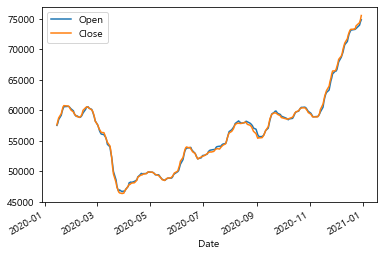

In [74]:
samsungDF.loc['2020'].rolling(window=10).mean().plot(y=['Open','Close'])

plt.show()